In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d mayankpatel14/second-hand-used-cars-data-set-linear-regression

Saving kaggle.json to kaggle.json
  0% 0.00/24.3k [00:00<?, ?B/s]
100% 24.3k/24.3k [00:00<00:00, 8.97MB/s]


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df=pd.read_csv('/content/second-hand-used-cars-data-set-linear-regression.zip')

In [4]:
df.head(10)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
5,6,650007,844846,6,148846,2,9,13,138,61,109,177933.5
6,7,633344,756063,5,78025,1,9,15,171,94,132,410877.0
7,8,662990,891569,6,76546,1,2,12,146,109,96,467471.5
8,9,543184,841354,7,57662,4,7,14,151,50,132,462397.5
9,10,573043,879481,2,132347,2,3,12,200,115,82,197266.0


In [5]:
df.shape

(1000, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


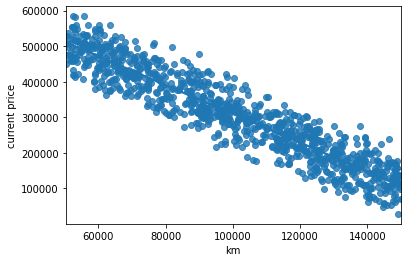

In [7]:
ax=sns.regplot(x='km',y='current price',data=df)

In [33]:
x=df[['on road old','on road now','years','km','rating','condition','economy','top speed','hp','torque']]
y=df['current price']

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
#model=keras.Sequential([keras.layers.Dense(units=1,input_shape=[10,])])
model=keras.Sequential([keras.layers.Dense(10,activation=tf.nn.relu,input_shape=[10,]),
                        keras.layers.Dense(1)])

In [39]:
model.compile(optimizer=Adam(0.01),loss='mean_squared_error')
history=model.fit(x_train,y_train,validation_split=0.25,epochs=30)

Epoch 1/30
19/19 [==============================] - 0s 6ms/step - loss: 17891000320.0000 - val_loss: 16579821568.0000
Epoch 2/30
19/19 [==============================] - 0s 3ms/step - loss: 13180598272.0000 - val_loss: 13091036160.0000
Epoch 3/30
19/19 [==============================] - 0s 3ms/step - loss: 10750313472.0000 - val_loss: 9657710592.0000
Epoch 4/30
19/19 [==============================] - 0s 3ms/step - loss: 8014307328.0000 - val_loss: 6872289792.0000
Epoch 5/30
19/19 [==============================] - 0s 3ms/step - loss: 5766959104.0000 - val_loss: 4263918592.0000
Epoch 6/30
19/19 [==============================] - 0s 4ms/step - loss: 3224870912.0000 - val_loss: 2223787008.0000
Epoch 7/30
19/19 [==============================] - 0s 3ms/step - loss: 1601301632.0000 - val_loss: 1041942592.0000
Epoch 8/30
19/19 [==============================] - 0s 3ms/step - loss: 743336768.0000 - val_loss: 492222208.0000
Epoch 9/30
19/19 [==============================] - 0s 3ms/step - los

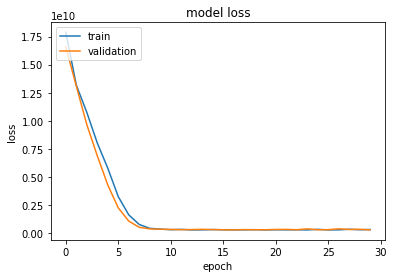

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [41]:
print(model.predict([[691388,811335,6,61559,3,9,12,160,53,105]]))

[[514063.84]]


In [42]:
print('Coefficients: \n', model.get_weights())

Coefficients: 
 [array([[ 0.37135726,  0.17829949,  0.3809237 , -0.42625633, -0.50943387,
        -0.07313526,  0.24834709,  0.5348509 , -0.38176274,  0.09721387],
       [-0.27497172, -0.29597193, -0.31388175,  0.21439588,  0.3868546 ,
         0.0397163 ,  0.55643404,  0.24070404,  0.5592006 , -0.08664016],
       [ 0.67235684,  0.17706311,  0.13541546, -0.07247776,  0.8388492 ,
         0.21575099,  0.13780527, -0.3154356 , -0.65549   , -0.3183656 ],
       [ 0.8529827 , -0.09213048,  1.2218745 , -0.41034558,  1.2542855 ,
        -0.19019991, -0.6053762 , -0.6498688 , -0.7985607 ,  0.46645153],
       [-0.01207942,  0.1294834 , -0.46997392, -0.4010658 ,  0.10068502,
         0.18733943, -0.15255211,  0.3566296 ,  0.15444018, -0.63986015],
       [-1.1023921 , -0.31987828, -2.3290942 ,  0.02120304, -3.688561  ,
        -0.54401636,  2.1998765 ,  2.255588  ,  1.9273113 , -1.3600149 ],
       [-0.1490306 ,  0.07712388,  0.16090156, -0.24858233, -0.26447722,
         0.0570969 ,  0.4726

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_prediction=model.predict(x_test)
print(r2_score(y_prediction,y_test))
print(mean_absolute_error(y_prediction,y_test))
print(mean_squared_error(y_prediction,y_test))

0.9849894013760203
11656.046796875
240332548.21335143


Text(0, 0.5, 'Y Predicted')

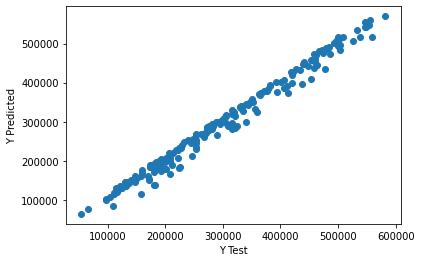

In [44]:
plt.scatter(y_test,y_prediction)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')